TOPICOS QUE PODEM SER INTERESSANTES:
- Ver como se comportam as networks com palavras com mais que um significado.
- Existem networks, por exemplo, de cenas relacionadas com racismo? Se sim, pode ser usado para detenção.
- Falar de que temos um set de bues palavras mas um texto nao usa tantas palavras, procurar quantas palavras diferentes costuma ter um texto e criar uma random network com isso.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from src.random_text import get_text

From Text to Word-adjacency networks

In [1]:
def get_network(text, disconnected_chars = ['.', ','], weighted=False):
    network = nx.DiGraph()
    words = text.split(" ")
    network.add_node(words[0])
    for (n, word) in enumerate(words[1:]):
        n+=1
        network.add_node(word)
        edge = (words[n-1], words[n])
        if edge in network.edges() and weighted:
            network.add_edge(edge[0], edge[1], weight=network.get_edge_data(*edge)['weight']+1)
        elif weighted: network.add_edge(*edge, weight=1)
        else: network.add_edge(*edge)
    
    network.remove_nodes_from(disconnected_chars)
    return network

Obtain text to analyse

In [41]:
text = get_text(size=10)

Convert from Text-To-Network

In [42]:
network = get_network(text, weighted=False)
print(network.edges())

[('trunchman', 'writ'), ('writ', 'neckless'), ('neckless', 'myxocystoma'), ('myxocystoma', 'khakanship'), ('khakanship', 'herbalism'), ('herbalism', 'untoward'), ('untoward', 'subunguial'), ('subunguial', 'supertower'), ('supertower', 'metainfective')]


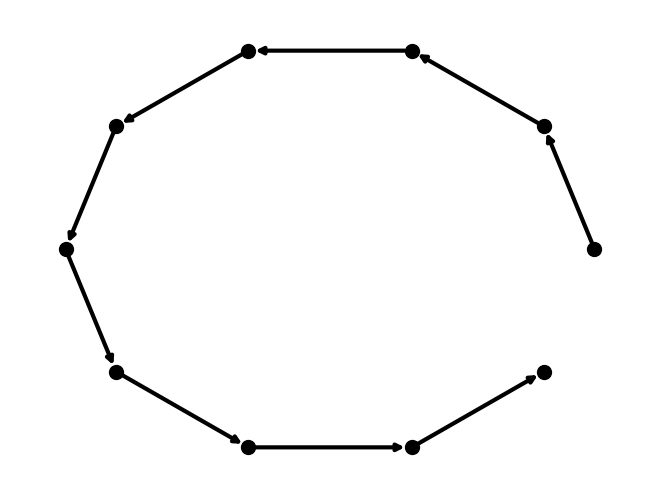

In [43]:
G = network
options = {

    'node_color': 'black',

    'node_size': 100,

    'width': 3,

}
nx.draw_circular(G, **options)
nw = plt.show()  



Network Properties:

(1) Degree Distribuition: 


É importante definir 3 situações: Um node só tem degree 1 se for um node no inicio ou no final de TODO o texto + não se repetindo. Um node tem degree 2 se for uma palavra que só se repete uma única vez no texto. Sempre que uma palavra se repete, terá sempre degree ímpar, considerando que se a palavra após for uma palavra que também estava após da mesma palavra numa recorrência anterior é considerada um novo edge.


Probabilidade de haver um node com degree n > 2, num set de K palavras:
$$P(k,n)=\frac{1}{\prod_{i=0}^{n-2}k-i}*(\frac{1}{k})^{n}$$


(2) Path Length:

(3) Clustering Coefficient:

(4) Connected Components:
